In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_masks.npy')

In [3]:
images.shape

(26333, 512, 512, 1)

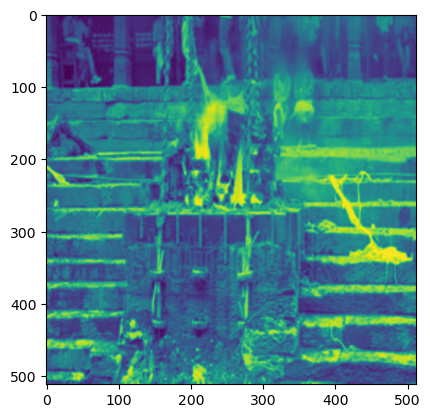

In [4]:
imshow(images[1])

In [5]:
masks.shape

(26333, 512, 512, 1)

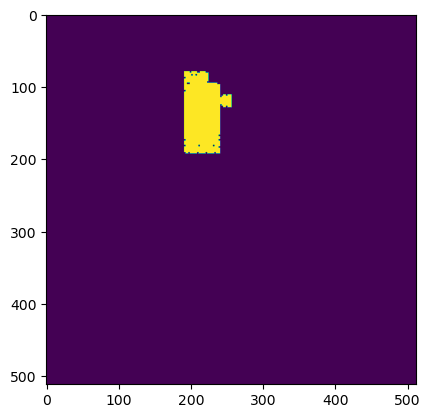

In [6]:
imshow(masks[1])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmps44vti4fkuc_unet2d


In [11]:
hist = C.train(images[0:21067], masks[0:21067], images[21067:26333], masks[21067:26333], batch_size=16, patience_counter=4)

Epoch 1/100
1317/1317 [==============================] - 375s 277ms/step - loss: 0.1635 - dice_coeff: 0.0386 - val_loss: 0.1371 - val_dice_coeff: 0.0356
Epoch 2/100
1317/1317 [==============================] - 361s 274ms/step - loss: 0.1506 - dice_coeff: 0.0531 - val_loss: 0.1185 - val_dice_coeff: 0.0763
Epoch 3/100
1317/1317 [==============================] - 362s 275ms/step - loss: 0.1296 - dice_coeff: 0.0895 - val_loss: 0.1198 - val_dice_coeff: 0.0947
Epoch 4/100
1317/1317 [==============================] - 361s 274ms/step - loss: 0.0936 - dice_coeff: 0.2944 - val_loss: 0.0878 - val_dice_coeff: 0.2742
Epoch 5/100
1317/1317 [==============================] - 361s 274ms/step - loss: 0.0649 - dice_coeff: 0.4876 - val_loss: 0.0792 - val_dice_coeff: 0.3048
Epoch 6/100
1317/1317 [==============================] - 361s 274ms/step - loss: 0.0526 - dice_coeff: 0.5781 - val_loss: 0.0863 - val_dice_coeff: 0.3509
Epoch 7/100
1317/1317 [==============================] - 360s 273ms/step - loss: 0

In [12]:
def visualize_predictions(model, images, masks, num_samples=100):
    for i in range(num_samples):
        x_val, y_val = images[i], masks[i]
        y_pred, _ = model.predict(x_val[np.newaxis, ...], y_val[np.newaxis, ...])

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)
        
        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

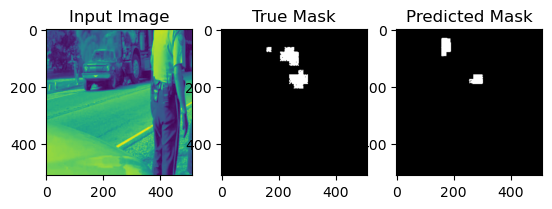

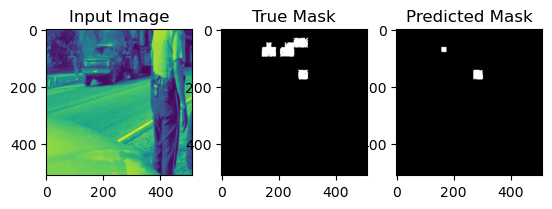

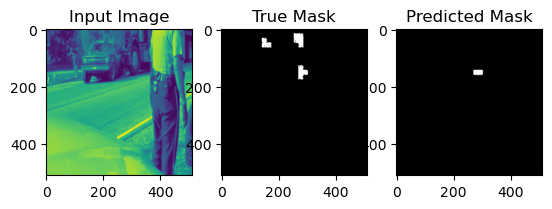

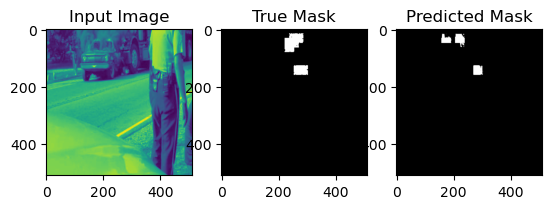

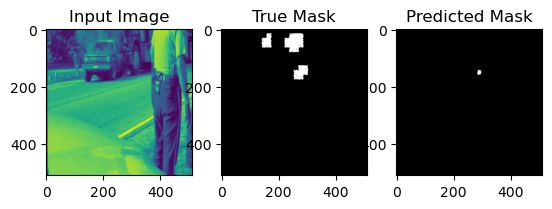

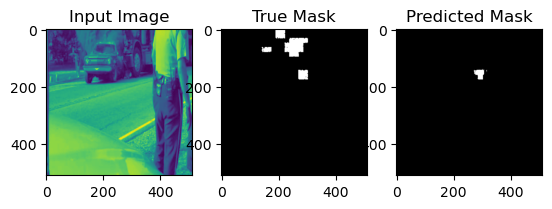

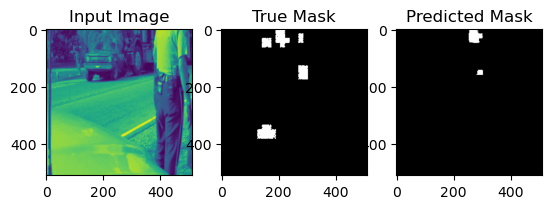

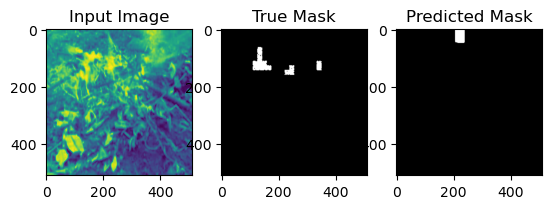

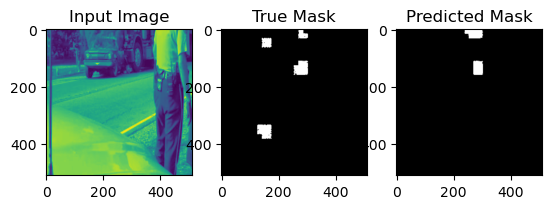

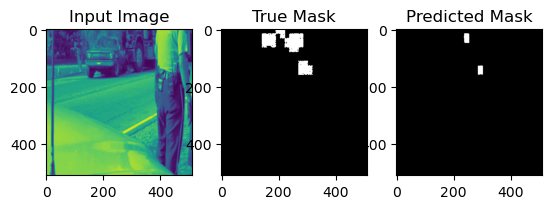

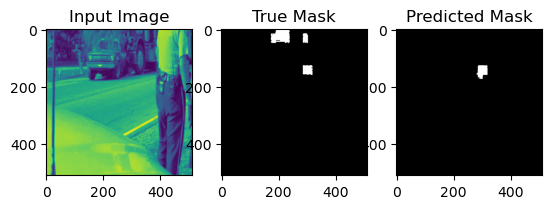

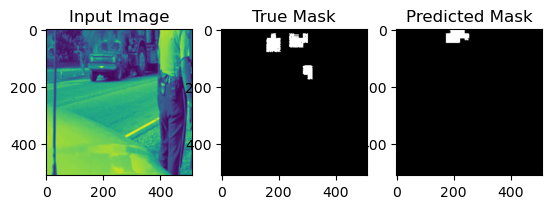

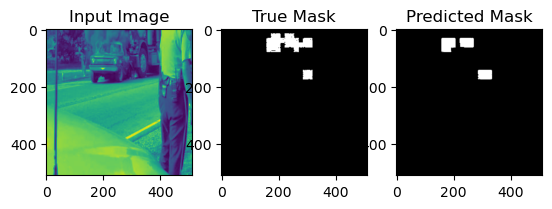

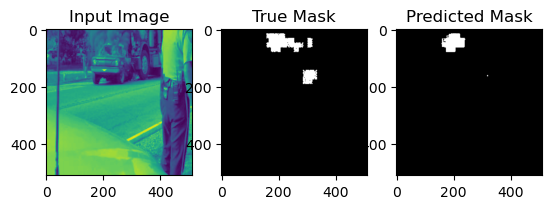

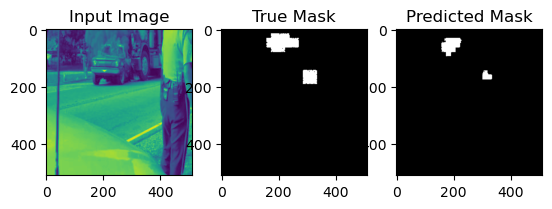

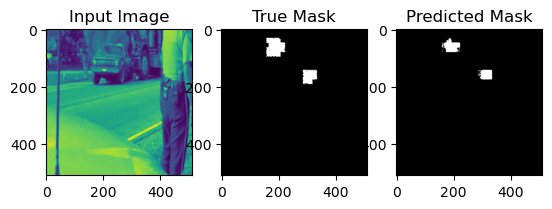

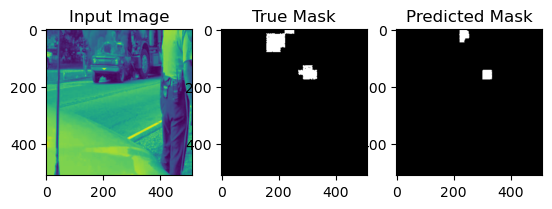

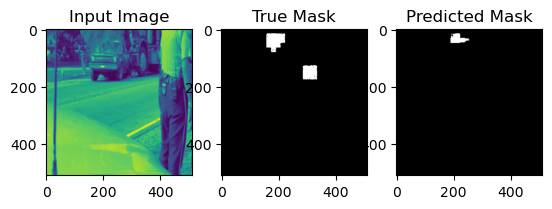

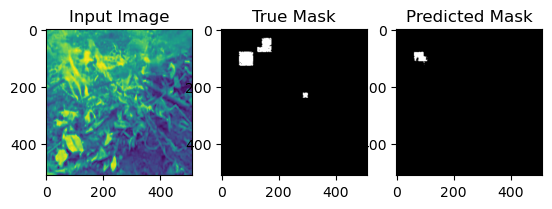

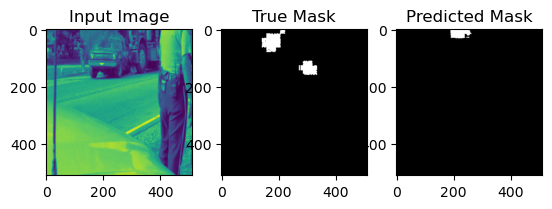

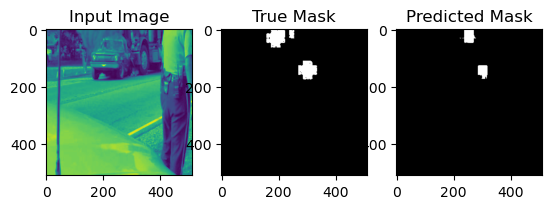

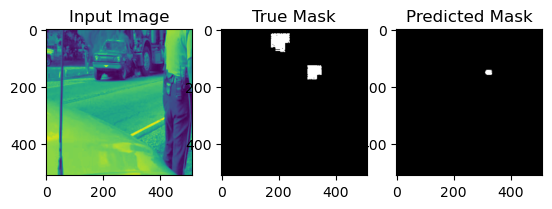

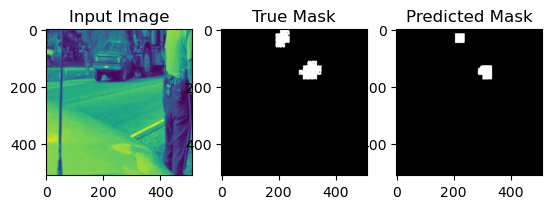

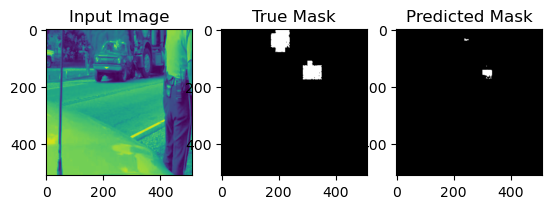

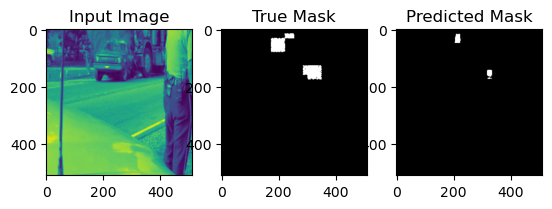

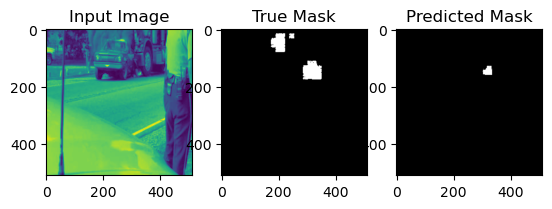

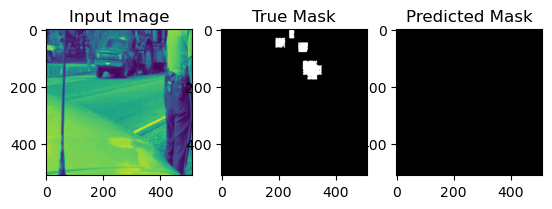

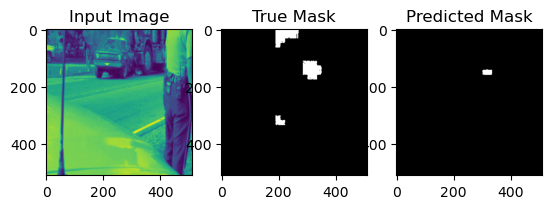

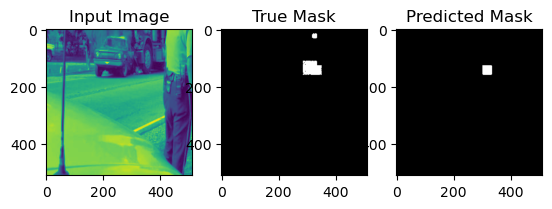

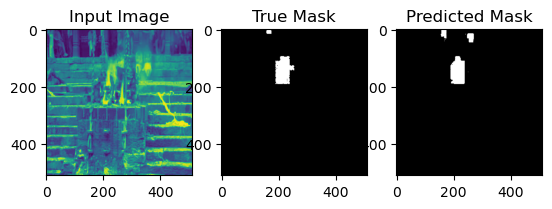

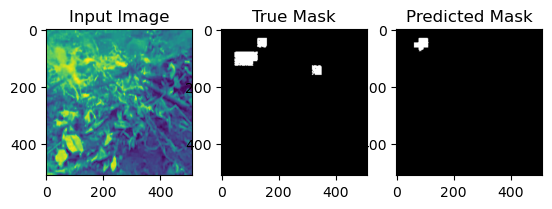

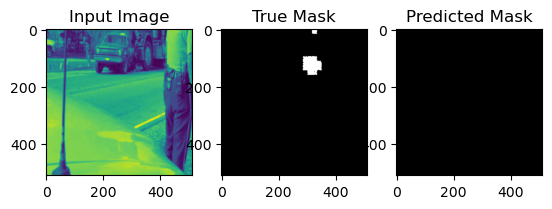

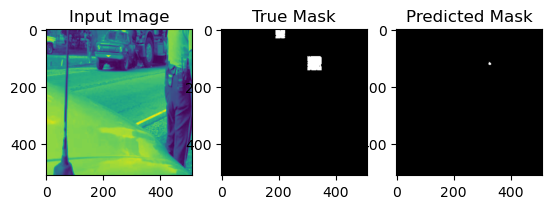

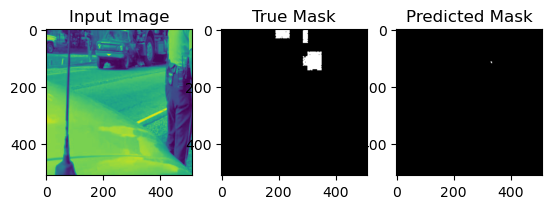

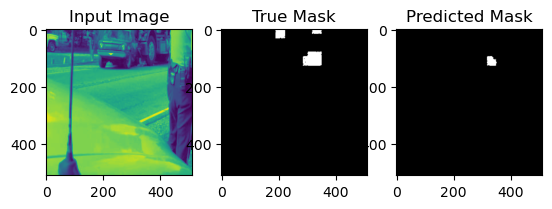

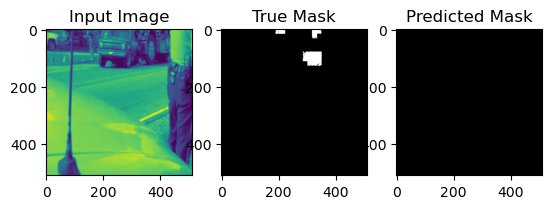

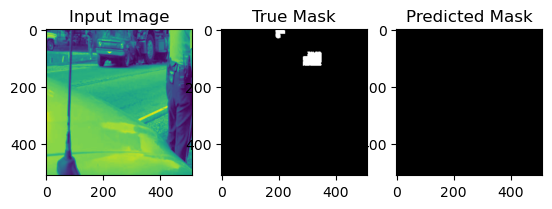

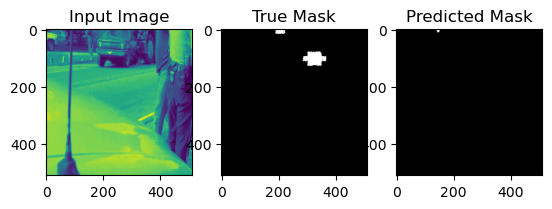

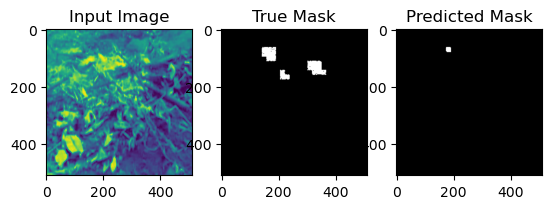

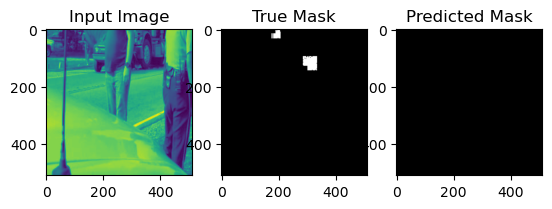

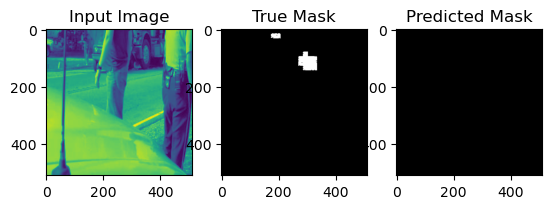

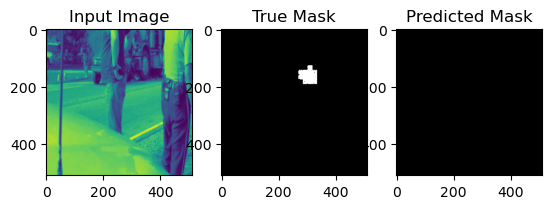

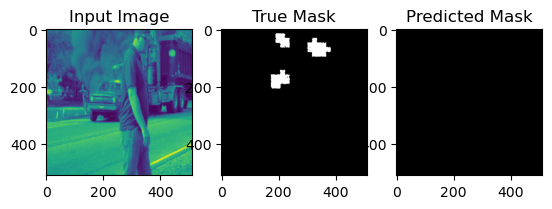

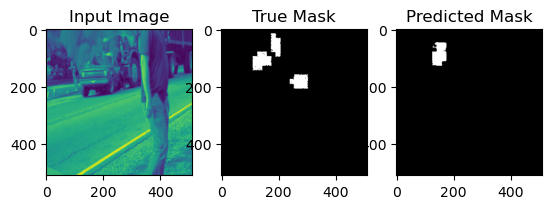

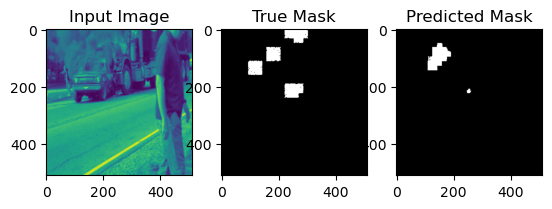

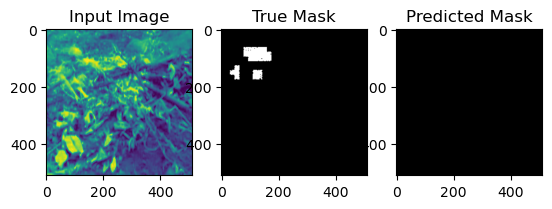

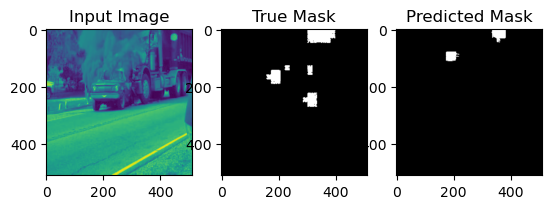

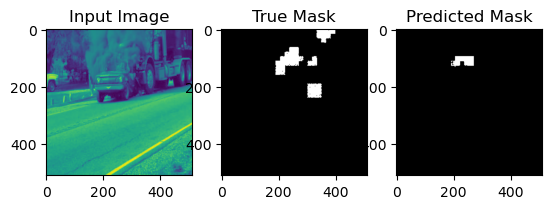

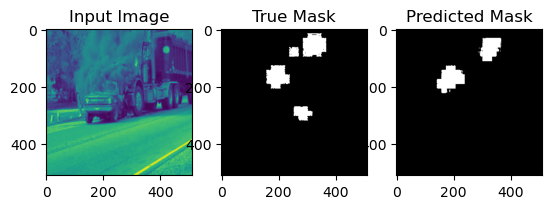

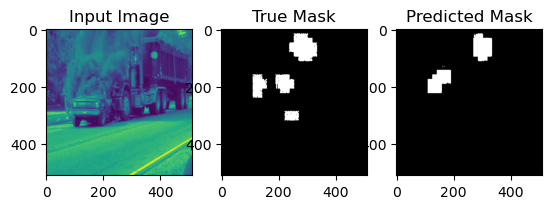

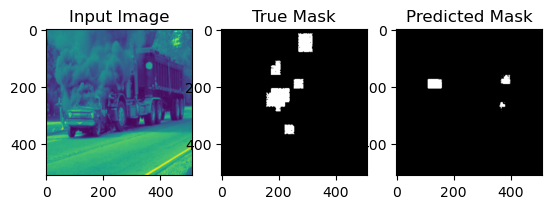

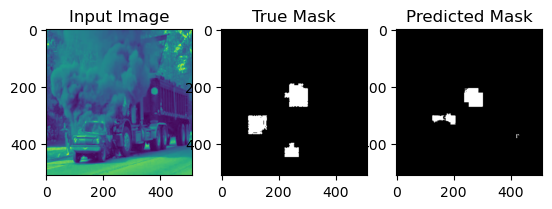

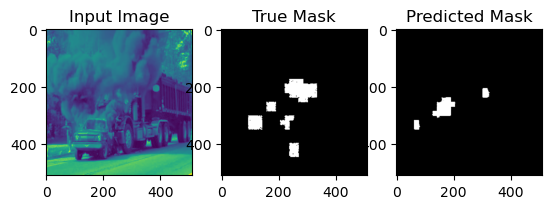

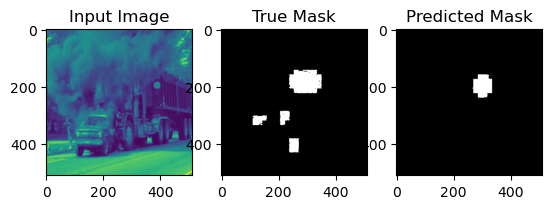

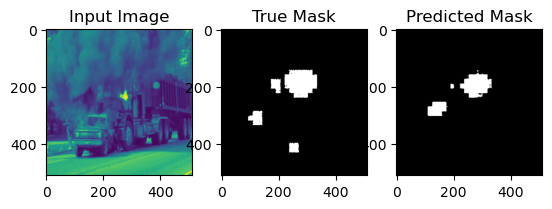

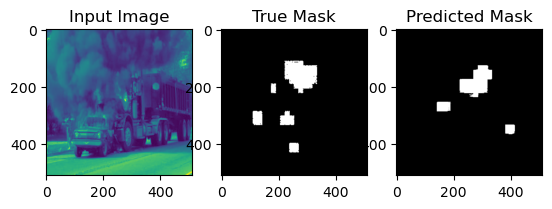

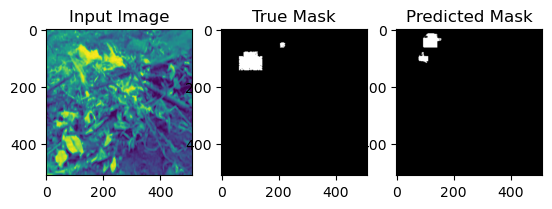

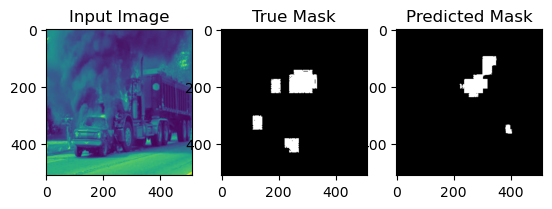

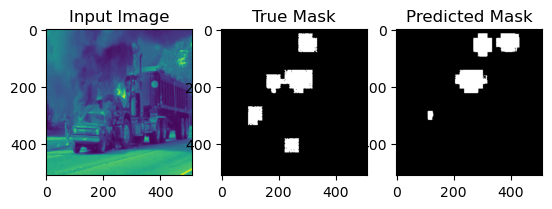

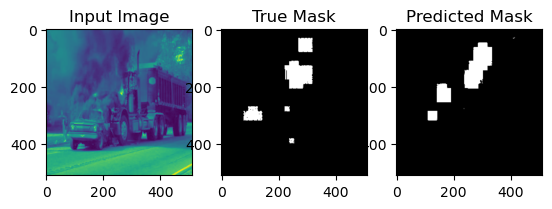

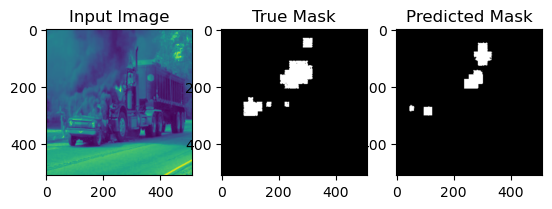

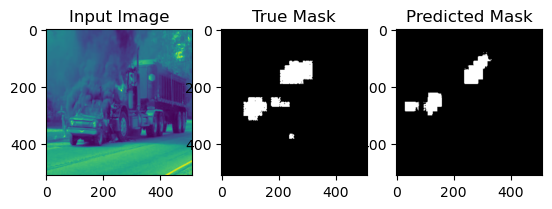

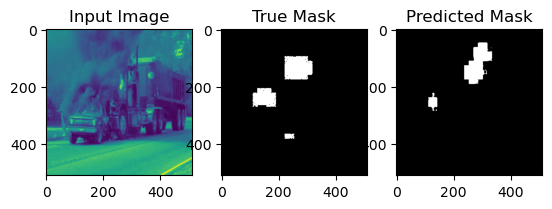

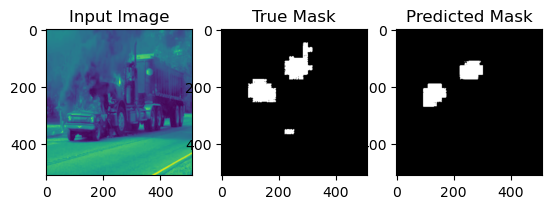

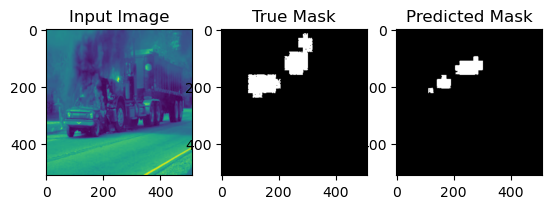

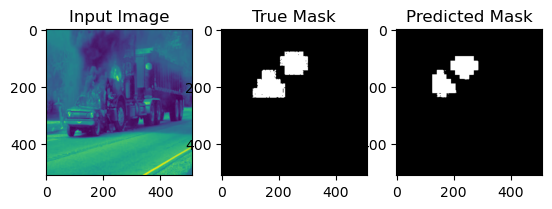

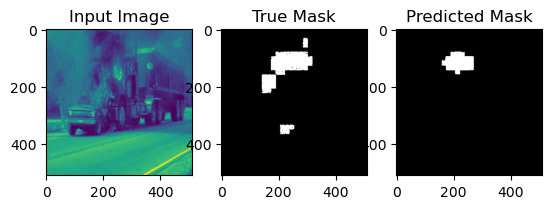

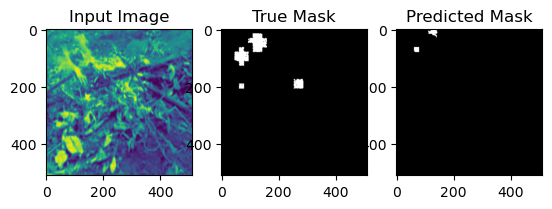

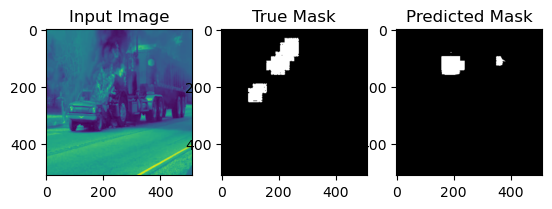

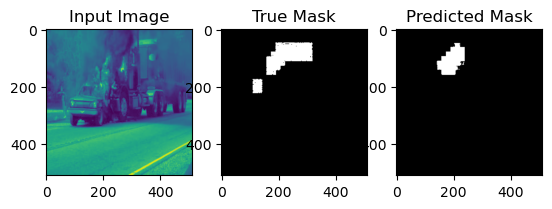

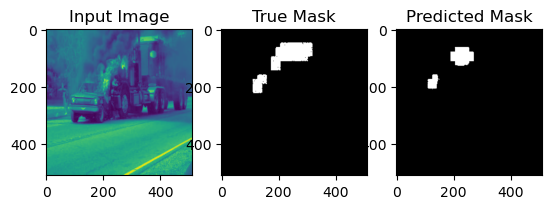

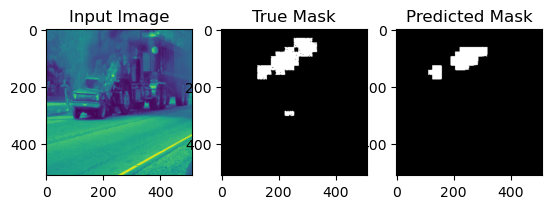

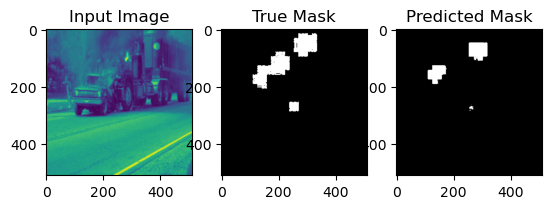

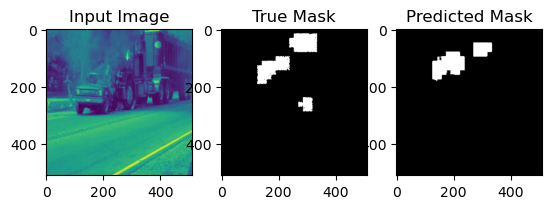

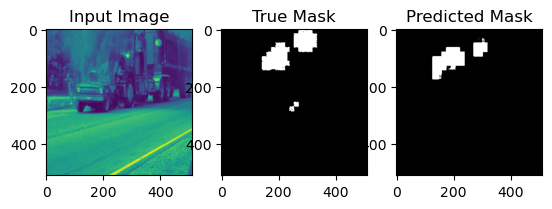

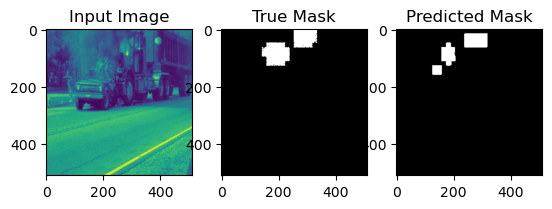

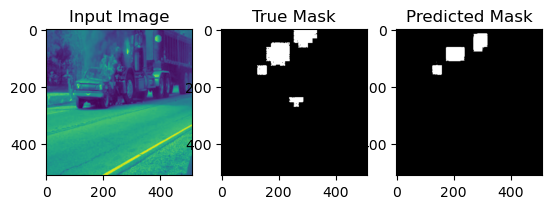

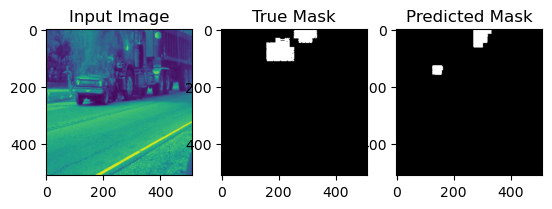

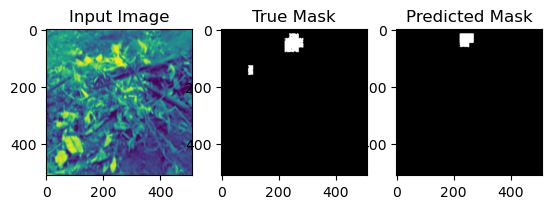

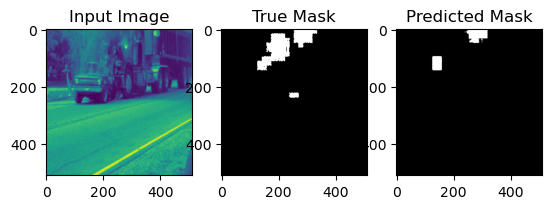

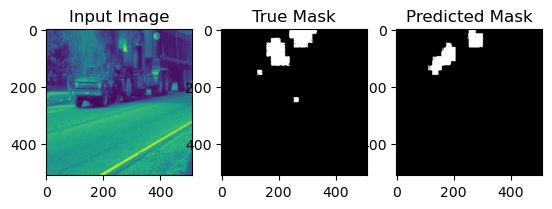

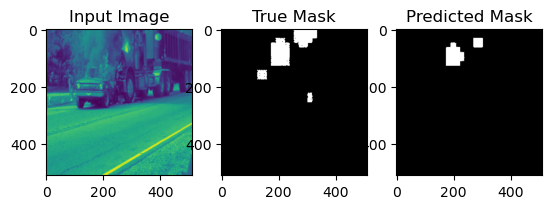

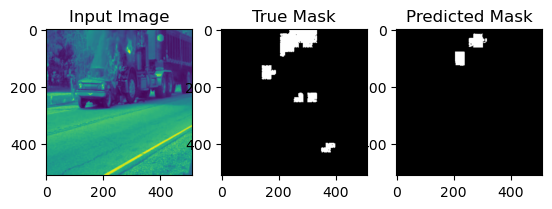

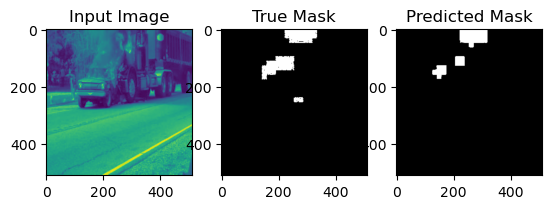

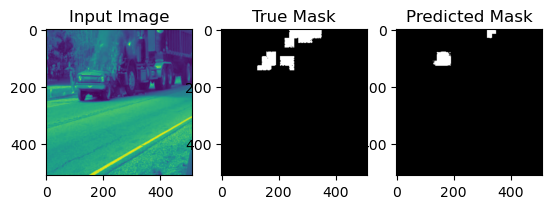

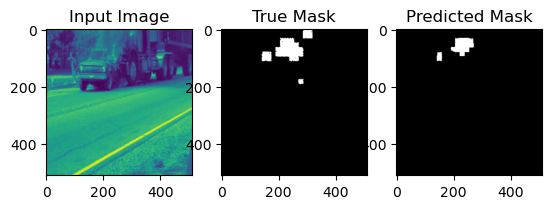

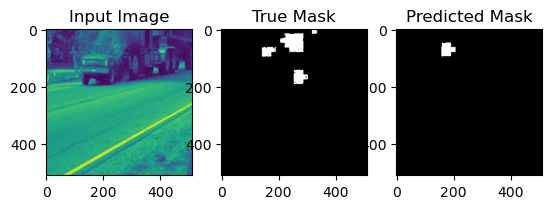

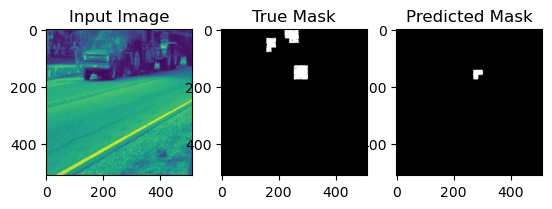

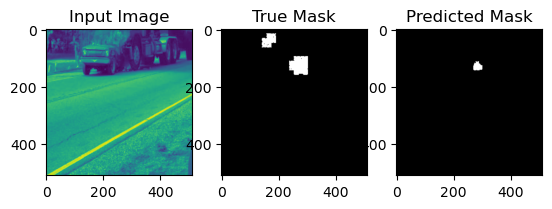

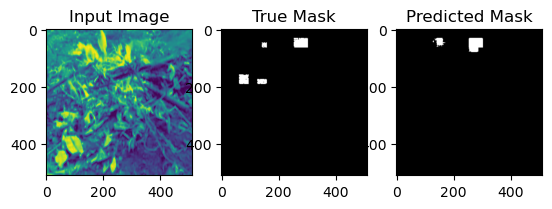

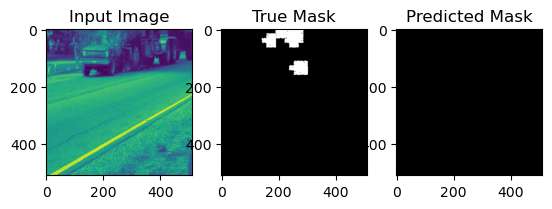

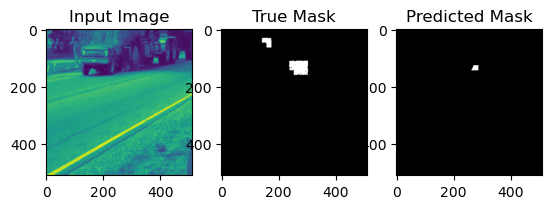

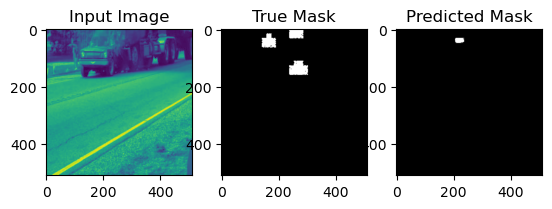

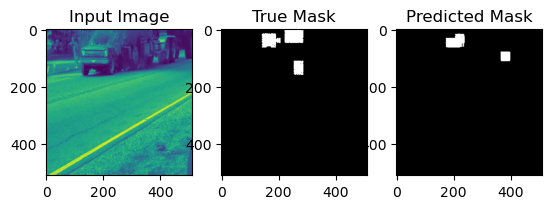

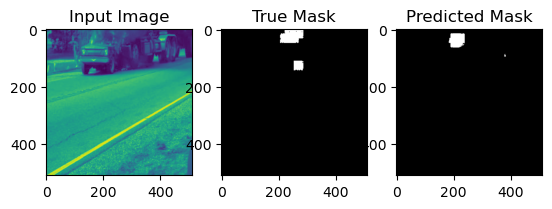

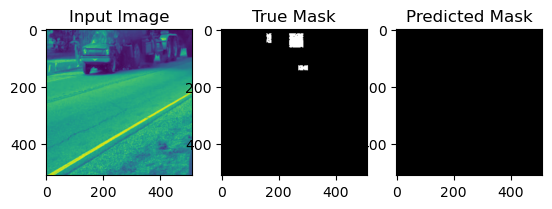

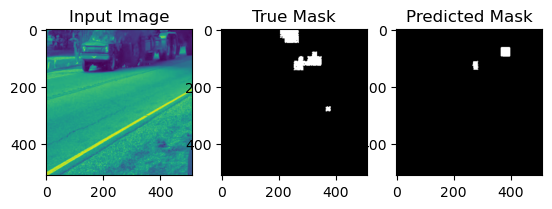

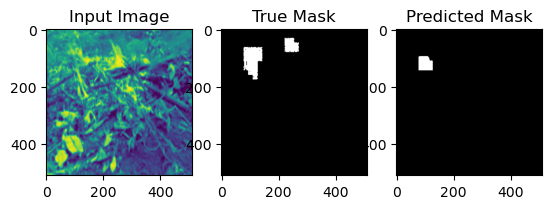

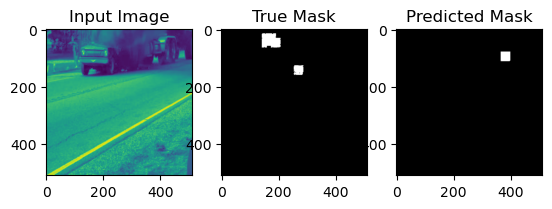

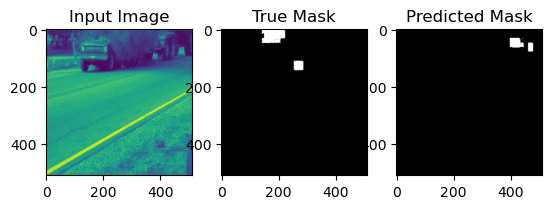

In [13]:
visualize_predictions(C, images[21067:26333], masks[21067:26333], num_samples=100)